# data
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE117498
raw UMI counts
# Tutorial reference
https://bioconductor.org/packages/release/workflows/vignettes/simpleSingleCell/inst/doc/umis.html
https://broadinstitute.github.io/2019_scWorkshop/data-wrangling-scrnaseq.html#goal-1

In [6]:
library(Seurat)
library(dplyr)
library(Matrix)
library(gdata)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following objects are masked from ‘package:dplyr’:

    combine, first, last

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



In [30]:
# it's okay to use read 10X for Nextseq data
readFormat <- function(infile) { 

    # First column after row names is some useless filler.
    counts <- read.delim(infile, stringsAsFactors=FALSE, 
        header=FALSE, row.names=1, skip=2)[,-1] 
    counts <- as.matrix(counts) # sparse matrix
    return(list(counts=counts))


In [31]:
gmp = readFormat('/home/hsher/nature2019_sc/raw_counts/GSM3305365_GMP.raw_counts.tsv')
cmp = readFormat('/home/hsher/nature2019_sc/raw_counts/GSM3305364_CMP.raw_counts.tsv')
mep = readFormat('/home/hsher/nature2019_sc/raw_counts/GSM3305363_MEP.raw_counts.tsv')
prebnk = readFormat('/home/hsher/nature2019_sc/raw_counts/GSM3305362_PreBNK.raw_counts.tsv')


In [32]:
gmp$counts

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,⋯,V1004,V1005,V1006,V1007,V1008,V1009,V1010,V1011,V1012,V1013
A1BG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
A4GNT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AA06,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAAS,1,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0


In [7]:
dim(gmp$counts) # 1012 cells, 25465 genes

[1] 25465  1012

In [8]:
object.size(gmp$counts) # size in bytes
object.size(as.matrix(gmp$counts)) # size in bytes sparse matrix to save memory??

[1] 104918816 bytes

[1] 104857984 bytes

# Filtering low quality data
- rare genes and rare cells

In [9]:
counts_per_cell <- Matrix::colSums(gmp$counts)

In [10]:
counts_per_cell

TGCCGGTA.ATCCCACG AGGGACTG.GGCGGTTT AATCGAAG.GATCGTTT AAACCGCC.CGTAGAAG 
            15599              7042              5216              4180 
AGGACACA.ACGCTCAG AGTCACAA.TTGCACGC GGTTGAGA.TCGACACC ATTTGTTG.ACTGAGTT 
             2778              1416             11540              6767 
CCATCCAC.GAGAGTAT CCATATGA.TGTCTTTC GATTGGGA.TGTAAAGG ACGGCAGT.CAGATTAC 
             5494              3765              2557              1466 
GTGGTGCT.TCGACACC GACACAAA.CCCTTCAG AGCGTGGT.CTTCGATT GGTCCTAA.ACGCTCAG 
            11255              6757              4688              3546 
GCCAACAT.GGTGACAC GAGGGTCA.AGTGAAAG CACAAGTA.TTCCAGAC CATGACGA.TACAGCCG 
             2708              1488             14299              6778 
CTGTTAAA.TAACCATC AGTTGAAC.CTTCTGGA AAGAACAG.CAGATTAC TGGTGTCT.AAACCTCC 
             5582              3915              2504              1237 
CTAGTAGG.CTCTTGAC CAAACATT.GTCCATGT GCCAAAGC.CAATTAGT GTCAGGTT.CCTATTCA 
            12633              6718              5300              3465 
GTAAACAA.AATGAATG AGGGTAAA.TCATGAGG AGAGGTGC.CGTATTTC TACCGCTC.GCAAAGCC 
             2655              1438             10944              6833 
ATATGGGT.GCTTTCCA CCAGACAG.TACTTGTG GACACCTG.TTTAACAG ACAAAGAT.CAATACTT 
             4689              3829              2655             12190 
ATGCGGAG.ATGGAAAT AACTGCCT.ACGTATAC TATGTGAA.CTCCGCAT TAAGGGCC.ATTCCTTG 
             6070              5049              3402              2621 
AGCATGCC.GGGCCAAT GTTCTGCT.AACAATCC CGGCTGTA.TGGCCTGT CCACGTTG.ATATGCAT 
             1549             12058              6156              5115 
GTCTGGAA.CGAGTCTG GCGTGCAA.GGAATAGA CCATATGA.TAAATAGG CCGGAAAT.ACGCCATT 
             3536              2490              1225             10669 
CGTGCAAC.TACAAACT CTTCTACG.AGAAGTCC GGAAGTCC.AGGCAACG CCCTTGCA.GGCTACTA 
             6378              5409              3629              2777 
CCGTAGCT.GACAACTT CTCTGCGT.TGTGCTCA GGTTACAC.GTGTAACC GTCTAATC.ATTTCCGG 
            12558              6451              5212              3531 
CGTTTCGT.AACCCTTG AATAAGGA.TCCAGTCC GCTTCTCC.CTACGAGC ATCGCGCT.TTGATTCT 
             2646              1284             12244              5952 
GCGGTAAC.AGGCAACG AAACACTA.CTAGACCC ACCCGATT.TAACCCGT CCATCGTC.GAGAGTAT 
             5135              3894              2647              1491 
TGCTTGGG.ATATCTTC GTGAGGCA.AAATGTCG GGCAAGGT.GGATAAAG ATAAGCTA.GGAAACAG 
            13086              6347              5201              3809 
ATTTGTTG.TCTGCATC ATCAGGGA.AGGTTGTG ACTCATAC.AAAGTCGG CTCCCAAA.AAGGTAAT 
             2344              1360             12673              6569 
CCATCGTC.ATATGCAT AAACGTGA.TTCCAGAC CTTTGGAC.CATTTGTT GTGAACTC.TTAAACTG 
             5001              3378              2673              1259 
ATCTTGGC.CATCTCCC GCATCGAG.AATGACCC AAGGATGA.GGCTACTA ACCAAGGG.AGCTACGG 
            10331              6272              4723              3672 
ATGGTCTG.CTTACGGG TATGTGAA.AGAGACTA TACCGCTC.GAGTTTCG ATGACAAC.GTATGAGT 
             2460              1260             12321              6135 
GGTTGAGA.ATGGGCAC AAACTGTG.GTTGTCAT CATTTCTA.TCTGTGGT CTAGACTA.TTTATCAC 
             4159              3816              2649              1297 
TACGTTCG.AGCTACGG AGGCGTTT.GTCCGTAC TCATAGCT.AGGCAACG GAGGAGTG.CCATTTGA 
            11159              6090              4985              3245 
CATTCGGG.CGACGTCA AGCTTCGA.GTGGATGG AACGGTAG.CCGCAACT GTCTTCCT.TTAAGCGT 
             2427              1340             11132              6148 
ATCAATCG.GCAGGGTA AAGGGACC.GATGTATT ACGGGTTA.CGAATAAT AATATGAC.GCAACCTG 
             4904              3812              2586             11732 
GCATCACT.GGGCCAAT GCTTCTCC.CGGACAAC TAGCGGAT.GAGAGTAT CCCTCTTG.GTGTCGGA 
             7330              5331              3720              2725 
AACTGCCT.CTTACGGG TAGGCTTT.ACCCATAT AATGGCGT.TTCCAGAC GGCACTTC.CTTCTGGA 
             1203             10730              6223              5154 
GGCTTTGC.CTGTTCTT GTAAACAA.TTCGTTCC CCTACGCT.GGCATGCT CTTC

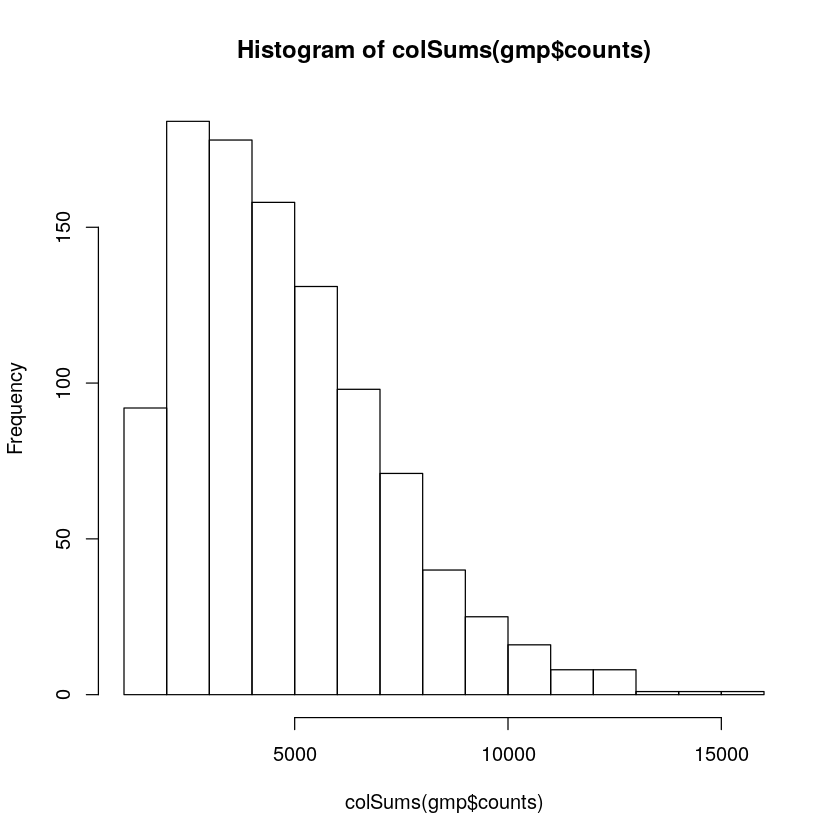

In [3]:
hist(colSums(gmp$counts)) # gene reads counts per cell

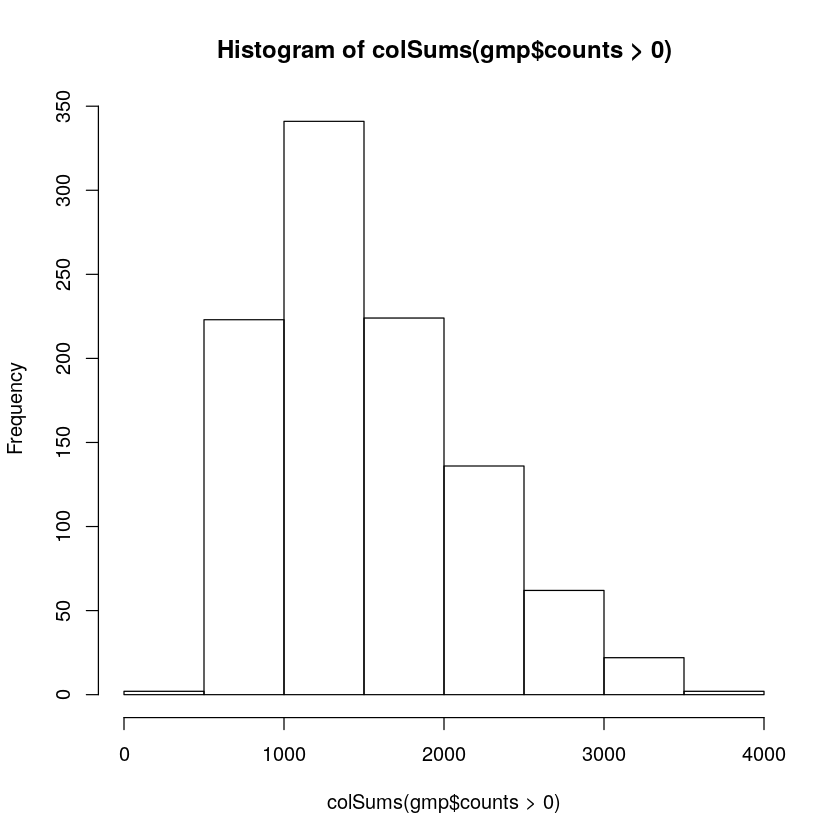

In [14]:
hist(colSums(gmp$counts>0)) # genes present per cell

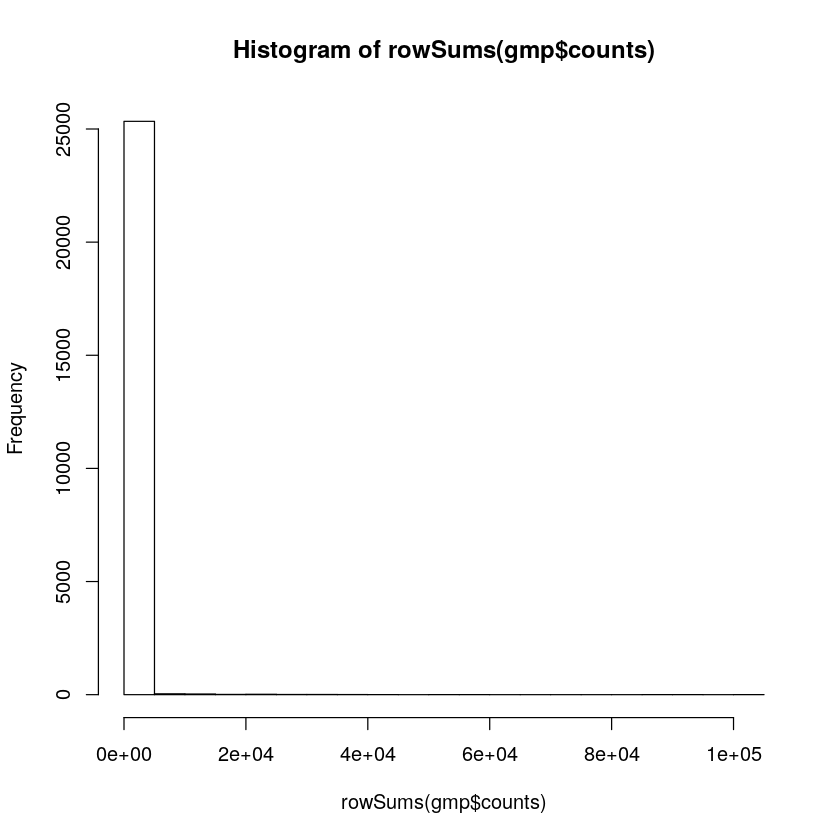

In [4]:
hist(rowSums(gmp$counts)) # reads per gene

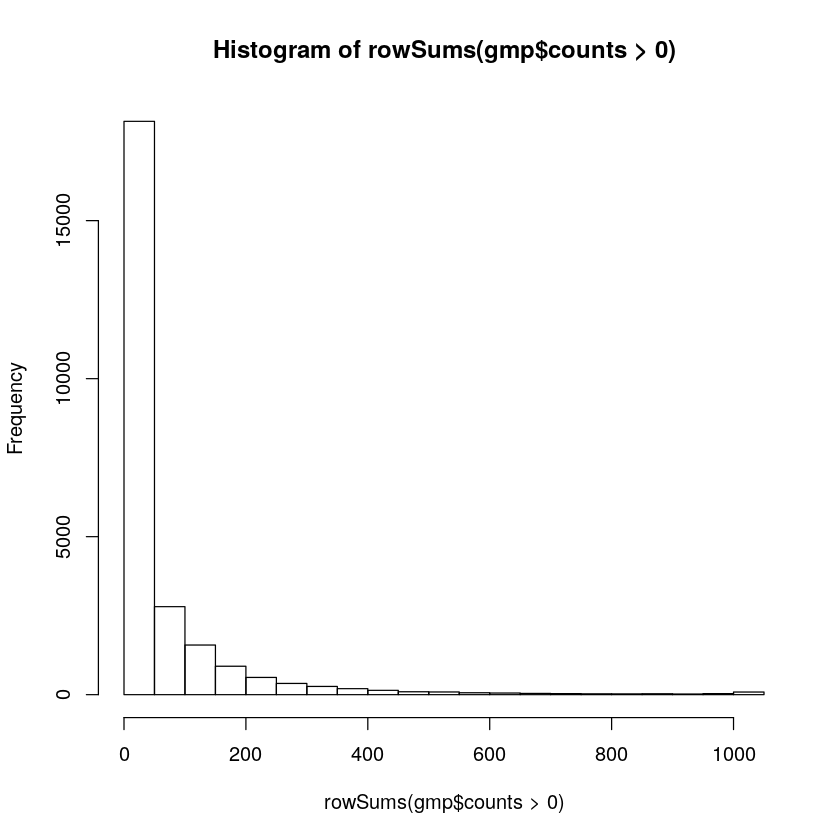

In [12]:
hist(rowSums(gmp$counts > 0))

## library complexity
One can use this plot to investigate observations (potential cells) that are actually failed libraries (lower end outliers) or observations that are cell doublets (higher end outliers).

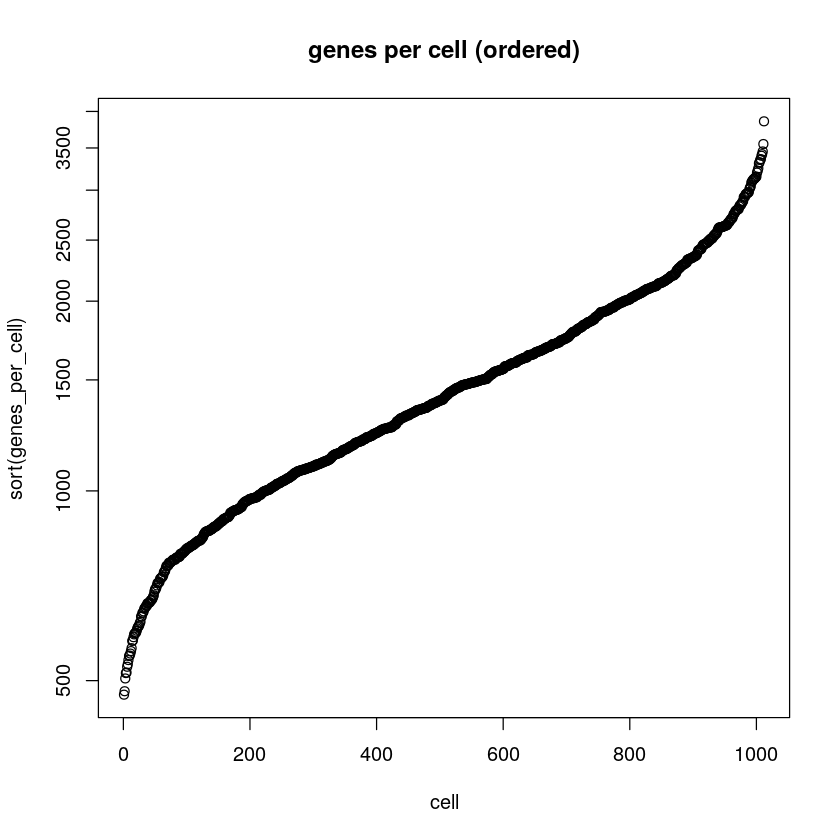

In [15]:
# library complexity
genes_per_cell <- Matrix::colSums(gmp$counts>0)
plot(sort(genes_per_cell), xlab='cell', log='y', main='genes per cell (ordered)')

## Starting with Seurat

In [33]:
seurat<-CreateSeuratObject(counts = gmp$counts)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [34]:
seurat[["percent.mt"]] <- PercentageFeatureSet(seurat, pattern = "^MT-") # % of mitochondrial genes

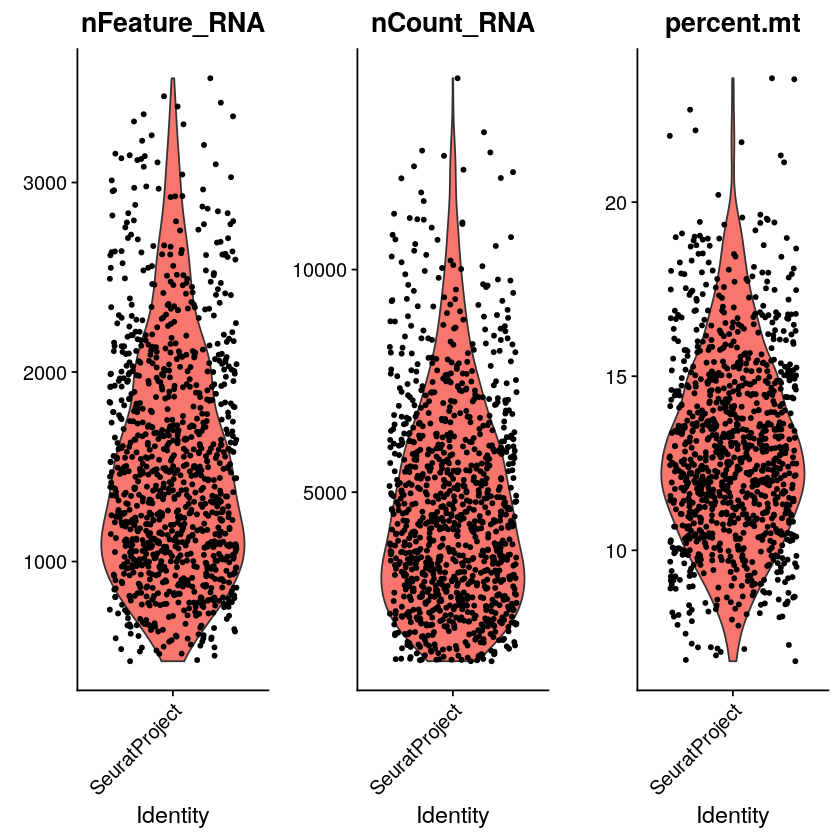

In [37]:
# visualize some QC metrix
VlnPlot(seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3) # nFeature(number of unique genes), nCount(number of molecules per cell)
# so many mitrochondrial genes => suerat usually filter 5%; the paper use 25%
# different kinds of cell has different % of mitochondrial genes; for example cariomyocyts has a lot; while lymphocyte doesn't
# for hematopoietic stem cell?
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5929161/

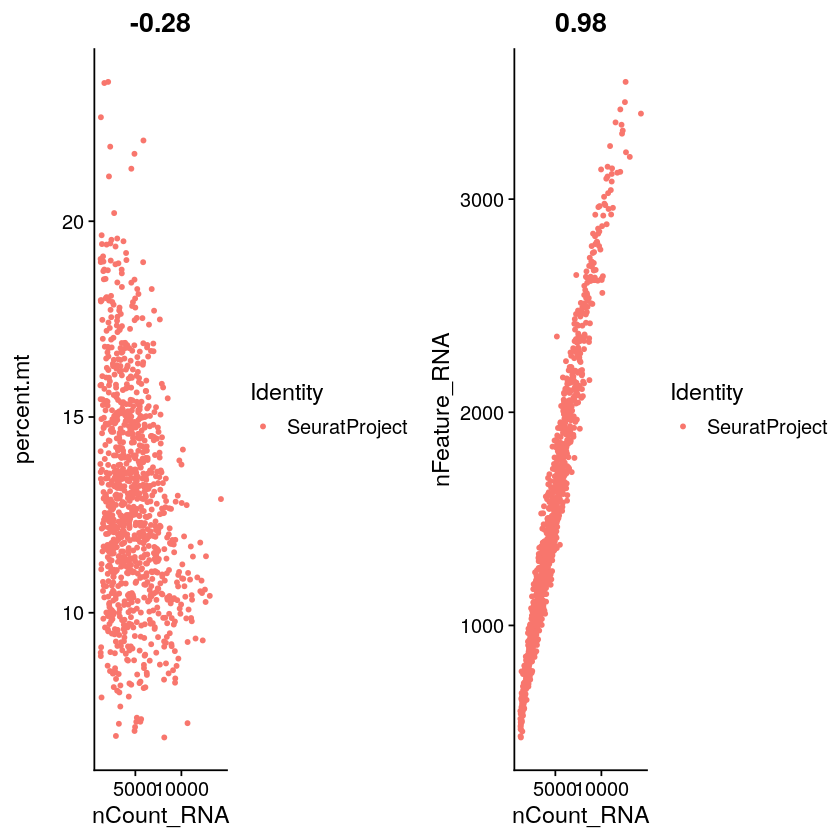

In [38]:
plot1 <- FeatureScatter(seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [46]:
# benchmark with the house keeping genes??
# 98 housekeeping genes compiled from this articel for scRNA-seq oligodendrocytoma
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5465819/
# downloaded from https://github.com/Michorlab/tnbc_scrnaseq

hkgenes <- read.table("/home/hsher/tnbc_scrnaseq/data/housekeepers.txt")
hkgenes <- as.vector(hkgenes$V1)

hkgenes.found <- which(toupper(rownames(seurat)) %in% hkgenes) # only pick the hkgenes found

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”Warning message:
“Graphs cannot be horizontally aligned unless the axis parameter is set. Placing graphs unaligned.”

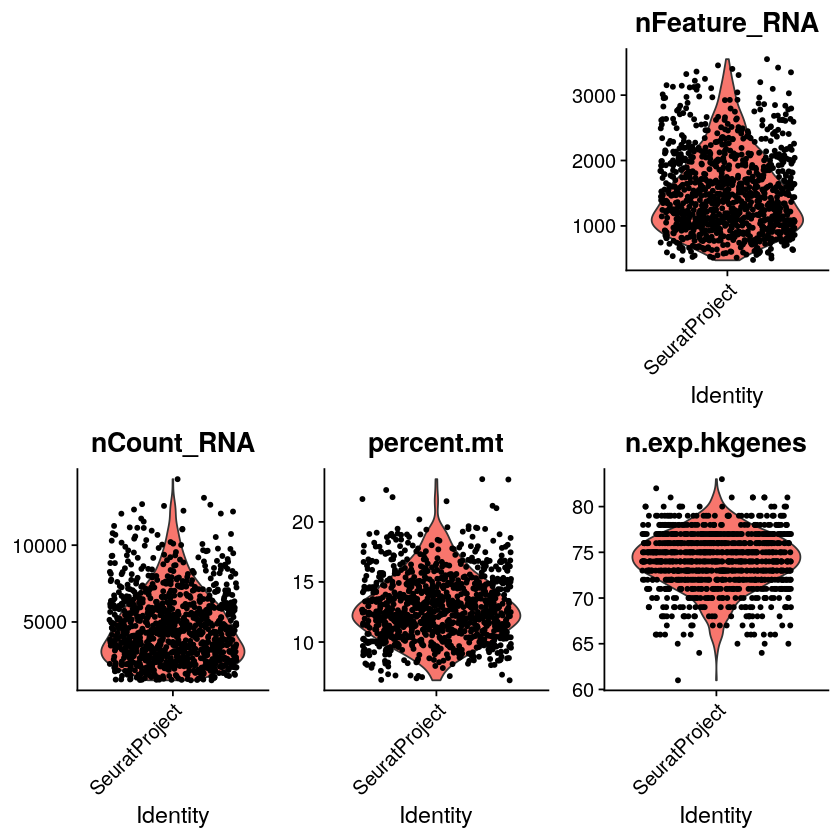

In [70]:
n.expressed.hkgenes <- seurat[hkgenes.found, ][['nFeature_RNA']] # how many housekeeping genes
seurat <- AddMetaData(object = seurat, metadata = n.expressed.hkgenes, col.name = "n.exp.hkgenes")
VlnPlot(object = seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt","n.exp.hkgenes"), nCol = 4,  point.size.use = 0.1)

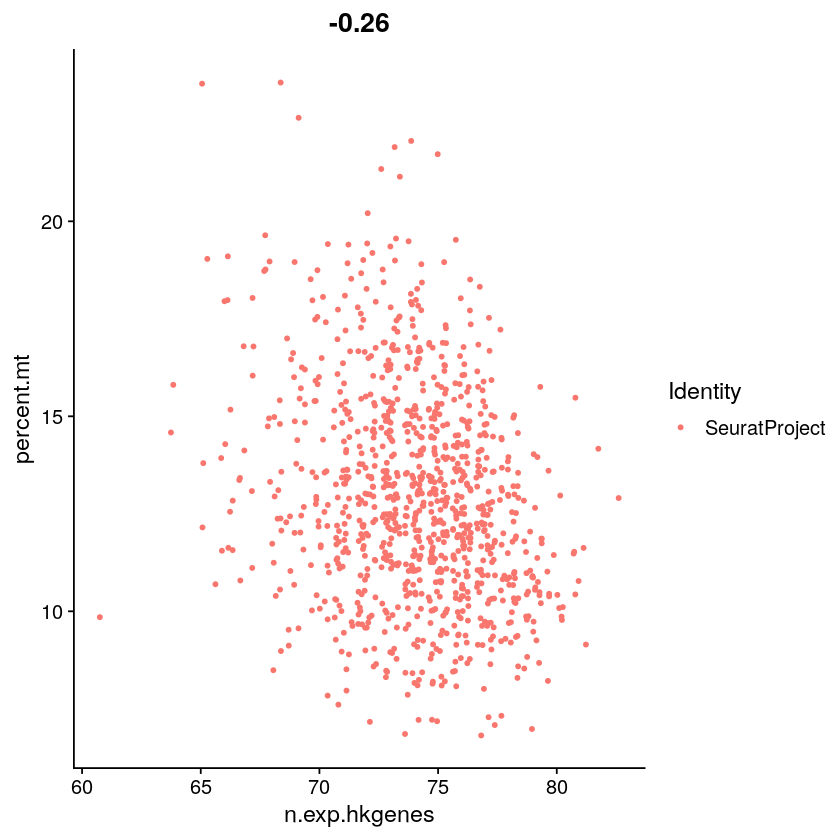

In [71]:
# correlation between mitochondria and housekeeping genes
plot1 <- FeatureScatter(seurat, feature1 = "n.exp.hkgenes", feature2 = "percent.mt")
print(plot1)

In [73]:
str(seurat)

Formal class 'Seurat' [package "Seurat"] with 12 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 7 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:1532655] 9 17 27 39 55 80 82 107 125 467 ...
  .. .. .. .. .. ..@ p       : int [1:1012] 0 2059 3552 4878 5848 6501 9861 11915 13293 14852 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 25464 1011
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:25464] "A1BG" "A1BG-AS1" "A1CF" "A2M" ...
  .. .. .. .. .. .. ..$ : chr [1:1011] "V3" "V4" "V5" "V6" ...
  .. .. .. .. .. ..@ x       : num [1:1532655] 1 1 1 1 2 1 3 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:1532655] 9 17 27 39 55 80 82 107 125 467 ...
  .. .. .. .. .. ..@ p       : int [1:1012] 0 2059 3552 4878 5848 6501 9861

In [ ]:
seurat <- FilterCells(object = seurat, subset.names = c("nCount_RNA", "percent.mito","n.exp.hkgenes"), low.thresholds = c(350, -Inf,55), high.thresholds = c(5000, 0.1, Inf))